In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
print("Training images: {}".format(x_train.shape))
print("Testing images: {}".format(x_test.shape))

Training images: (50000, 32, 32, 3)
Testing images: (10000, 32, 32, 3)


In [ ]:
print(x_train[0].shape)

(32, 32, 3)


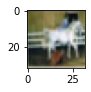

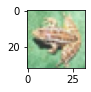

In [ ]:
for i in range(230,232):
  plt.subplot(120+1+i)
  img = x_train[i]
  plt.imshow(img)
  plt.show()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255
n_classes = 10

print("Shape before one-hot encoding: ",y_train.shape)
y_train = np_utils.to_categorical(y_train,n_classes)
y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding: ",y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,MaxPool2D,Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
#hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))
#output layer
model.add(Dense(10,activation='softmax'))
#compile
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
#training
model.fit(x_train,y_train,batch_size=128,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
391/391 [==============================] - 597s 1s/step - loss: 1.8623 - accuracy: 0.3049 - val_loss: 1.1669 - val_accuracy: 0.5771
Epoch 2/20
391/391 [==============================] - 578s 1s/step - loss: 1.1409 - accuracy: 0.5964 - val_loss: 0.9299 - val_accuracy: 0.6696
Epoch 3/20
391/391 [==============================] - 577s 1s/step - loss: 0.9048 - accuracy: 0.6854 - val_loss: 0.7804 - val_accuracy: 0.7325
Epoch 4/20
391/391 [==============================] - 569s 1s/step - loss: 0.7612 - accuracy: 0.7362 - val_loss: 0.7274 - val_accuracy: 0.7464
Epoch 5/20
391/391 [==============================] - 573s 1s/step - loss: 0.6892 - accuracy: 0.7600 - val_loss: 0.7154 - val_accuracy: 0.7526
Epoch 6/20
391/391 [==============================] - 563s 1s/step - loss: 0.6233 - accuracy: 0.7821 - val_loss: 0.6840 - val_accuracy: 0.7631
Epoch 7/20
391/391 [==============================] - 570s 1s/step - loss: 0.5653 - accuracy: 0.8003 - val_loss: 0.6719 - val_accuracy: 0.7731

In [ ]:
classes = range(0,10)
names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

class_labels = dict(zip(classes,names))

batch = x_test[100:109]
labels = np.argmax(y_test[100:109],axis=-1)

predictions = model.predict(batch,verbose=1)

1/1 [==============================] - 1s 522ms/step


In [ ]:
print(predictions)

[[1.84396084e-03 6.37454286e-05 3.87945324e-01 3.58742522e-03
  3.14280659e-01 7.75121078e-02 4.80555958e-04 2.13732049e-01
  1.79854047e-04 3.74290918e-04]
 [5.16667524e-06 2.88042520e-06 5.20023098e-03 2.03340322e-01
  3.92779894e-02 7.26812661e-01 1.20111806e-02 1.28231766e-02
  3.62427818e-06 5.22737450e-04]
 [9.02374666e-07 2.01618627e-06 3.05032427e-03 1.14945031e-03
  3.80481943e-05 8.19521199e-04 9.94936228e-01 8.87316958e-07
  5.01311604e-07 2.28588942e-06]
 [1.73739831e-12 1.50517758e-11 4.65984478e-08 9.96044397e-01
  5.79384221e-08 4.90730235e-05 3.90654057e-03 6.57985610e-10
  1.63381286e-09 6.27276409e-09]
 [1.19486938e-11 9.99846458e-01 2.97012868e-18 5.04104459e-16
  6.97360199e-19 2.98041007e-19 5.47231512e-16 7.46573103e-19
  9.58161284e-09 1.53535904e-04]
 [4.59987071e-09 9.99991655e-01 1.12149331e-12 1.19533689e-11
  1.78768315e-15 1.20547961e-15 4.79269619e-13 3.26026078e-16
  6.03428418e-07 7.74424097e-06]
 [7.52723834e-04 1.28437523e-05 1.93192121e-02 2.91222900e

In [ ]:
for image in predictions:
  print(np.sum(image))

0.99999994
0.99999994
1.0000001
1.0000001
1.0
1.0
0.99999994
1.0
1.0


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)


[2 5 6 3 1 1 6 6 8]


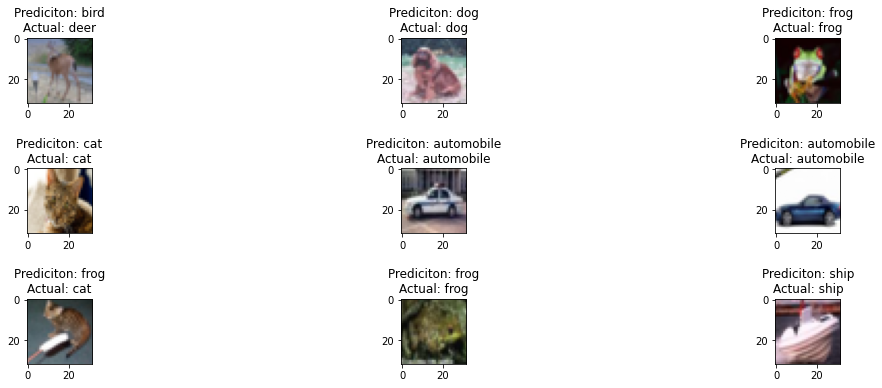

In [ ]:
fig,axs = plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i ,img in enumerate(batch):
  for key,value in class_labels.items():
    if class_result[i] == key:
      title = 'Prediciton: {}\nActual: {}'.format(class_labels[key],class_labels[labels[i]])
      axs[i].set_title(title)
      #axs[i].axis.get_xaxis().setvisible(False)
      #axs[i].axis.get_yaxis().setvisible(False)

  axs[i].imshow(img)
plt.show()        